In [19]:
import numpy as np
import scipy
import matplotlib.pylab as plt
import math

In [20]:
def orient():

    #everything under the sun:
    #roll = 0
    roll = np.random.uniform(low=-180, high=180)
    """ usual range in aersospace operations. Angle of 0 means everything is level. 180 = upside down.
        low ≤ x < high for np.random.uniform
    """
    #pitch = 0
    pitch = np.random.uniform(low=-180, high=180)
    """ kind of weird to think about. 90 is nose straight up, -90 is nose straight down. Everything after that means your plane is cooked
        low ≤ x < high for np.random.uniform
    """
    yaw = 0
    #yaw = np.random.uniform(low=-180, high=180)
    #""" 0 is nose forward, +90 is nose to the right (starboard), -90 is nose to the left (port), +180/-180 nose is backwards
    #    low ≤ x < high for np.random.uniform
    #"""



    #################################################

    phi = np.radians(roll)  # Roll ( around X-axis)
    theta = np.radians(pitch) # Pitch ( around Y-axis)
    psi = np.radians(yaw)   # Yaw ( around Z-axis)

    R_x = np.array([ # Rotation matrix for R_x (roll) // no adjustment, positive roll = right wing down/left wing up
        [1, 0, 0],
        [0, np.cos(phi), -np.sin(phi)],
        [0, np.sin(phi), np.cos(phi)]
    ])
    
    R_y = np.array([ # Rotation matrix for R_y (pitch) // adjusted so that positive pitch = pitch up
        [np.cos(theta), 0, -np.sin(theta)],
        [0, 1, 0],
        [np.sin(theta), 0, np.cos(theta)]
    ])
    
    R_z = np.array([ # Rotation matrix for R_z (yaw) // adjusted so positive yaw is cw
        [np.cos(psi), np.sin(psi), 0],
        [-np.sin(psi), np.cos(psi), 0],
        [0, 0, 1]
    ])

    R = np.dot(np.dot(R_x,R_y),R_z)

    #################################################
    # switching to sphereical coords
        
    theta = np.linspace(0, 2 * np.pi, 50)  #azimuthal angle
    phi = np.linspace(0, np.pi, 50) # polar angle
    rho = 1 # radius of sphere (could randomize later if we wanted)

    theta, phi = np.meshgrid(theta, phi) #creates a grid of theta and phi values or a tensor if you will
    # creates a 50x50x2 array where each element is a (theta, phi) pair

    # Convert spherical to Cartesian coordinates
    x = rho * np.sin(phi) * np.cos(theta)
    y = rho * np.sin(phi) * np.sin(theta)
    z = rho * np.cos(phi)

    # currently we have x,y,z which are all 50x50 matrices representing points on the sphere
    # in order to get something useful, we can use np flatten to make them all 1D arrays like so:
    pts = np.array([x.flatten(), y.flatten(), z.flatten()]) #Now we have 3 1D arrays of length 2500 each representing points on the sphere

    # we can now rotate the points using the randomized rotation matrix R from earlier
    newPts = np.dot(R,pts)

    #turn back into a 50x50 matrix for plotting or whatever else
    # we maninly turned it into a 1D array to make the matrix multiplication work with the R matrix
    rotX = newPts[0,:].reshape((x.shape[0],x.shape[1])) 
    rotY = newPts[1,:].reshape((y.shape[0],y.shape[1])) 
    rotZ = newPts[2,:].reshape((z.shape[0],z.shape[1]))
    

    #################################################
    dirX = np.array([rho*2,0,0]) # pointing along x axis
    dirY = np.array([0,rho*2,0]) # pointing along x axis
    dirZ = np.array([0,0,rho*2]) # pointing along x axis


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(rotX, rotY, rotZ, color='lightblue')
    ax.plot_wireframe(rotX, rotY, rotZ, color='black', alpha= 0.1)
    ax.quiver3D(0, 0, 0, dirX[0], 0, 0, color='red', linewidth=1) #positive x direction
    ax.quiver3D(0, 0, 0, 0, dirY[1], 0, color='green', linewidth=1) #positive y direction
    ax.quiver3D(0, 0, 0, 0, 0, dirZ[2], color='blue', linewidth=1) #positive z direction
    ax.set_xlim([-rho*2, rho*2])
    ax.set_ylim([-rho*2, rho*2])
    ax.set_zlim([-rho*2, rho*2])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('Randomly Oriented Sphere')
    plt.show()


    return None


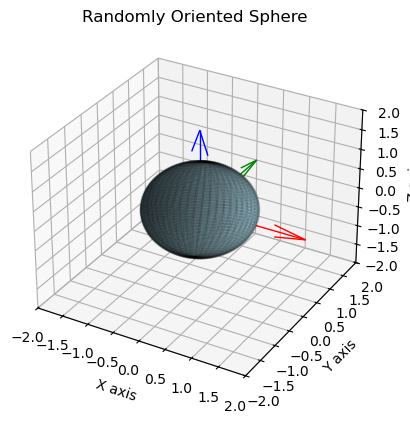

In [21]:
orient()

